# Project: Wrangling and Analyze Data

## Data Gathering

* In this section, I obtained the three data sets required for the project

In [1]:
#First dataset (twitter weratedogs archive data)

In [1]:
import tweepy
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from timeit import default_timer as timer

In [2]:
df_twitter=pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


* Second dataset (image_prediction dataset downloaded from the internet using the request library)

In [3]:
#downloading the second file needed
response=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)

In [3]:
#reading the second file into a dataframe
df_image=pd.read_csv('image_predictions.tsv',sep='\t')
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


* Third dataset (additional data gathered using the twitter api)

In [5]:
#accessing the last document required
api_key='*****'
api_key_secret='*****'
bearer_token='*****'
access_secret='*****'
access_token_secret='*****'

auth=tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_secret,access_token_secret)
api=tweepy.API(auth)

#getting the tweet ids from the first dataset provided
twitter_id=df_twitter['tweet_id'].values

#this codes uses a for loop to download the contents of each tweet ids and write them as a json file into a tweet_json.txt file
failed_ids=[]
start=timer()
with open ('tweet_json.txt','w') as file:
    for ids in twitter_id:
        try:
            tweet = api.get_status(ids,tweet_mode='extended')
            json.dump(tweet._json,file)
            file.write('\n')
        except:
            failed_ids.append(ids)
            pass
end=timer()

In [7]:
#the code below loops through the tweet_json.txt file downloaded above, converts each tweet id content to a json object, and
#queries each json object for the selected keys indicated in the dictionary
df={
'tweet_id':[],
'date':[],
'retweet_count':[],
'favorite_count':[],
'full_text':[],
'followers_count':[],
}
with open ('tweet_json.txt','r') as f:
    for line in f:
        try:
            loaded_json=json.loads(line)
            df['date'].append(loaded_json['created_at'])
            df['tweet_id'].append(loaded_json['id'])
            df['retweet_count'].append(loaded_json['retweet_count'])
            df['favorite_count'].append(loaded_json['favorite_count'])
            df['full_text'].append(loaded_json['full_text'])
            df['followers_count'].append(loaded_json['user']['followers_count'])
            df['favourites_count'].append(loaded_json['user']['favourites_count'])
        except:
            pass

In [19]:
#the code below converts the dictionary into a pandas dataframe
df_api_data=pd.DataFrame(df)
df_api_data.to_csv('df_api_data.csv',index=False)

In [5]:
df_api_data.head(3)

,tweet_id,date,retweet_count,favorite_count,full_text,followers_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,7042,33885,This is Phineas. He's a mystical boy. Only eve...,9257534
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5317,29385,This is Tilly. She's just checking pup on you....,9257534
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3498,22100,This is Archie. He is a rare Norwegian Pouncin...,9257534


## Assessing Data

In [6]:
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2283,667200525029539841,NaN,NaN,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,None,None,None,None
2055,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598...,11,10,Tanner,None,None,None,None
1430,697575480820686848,NaN,NaN,2016-02-11 00:18:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ole. He's not sure how to gravity. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697575480...,8,10,Ole,None,None,None,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None
1754,678798276842360832,NaN,NaN,2015-12-21 04:44:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She fucking hates trees. 7/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678798276...,7,10,Linda,None,None,None,None


In [9]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1759,825829644528148480,https://pbs.twimg.com/media/C3XvqILXUAU2nnT.jpg,2,Great_Pyrenees,0.853407,True,golden_retriever,0.053531,True,English_setter,0.045830,True
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True
539,676957860086095872,https://pbs.twimg.com/ext_tw_video_thumb/67695...,1,Labrador_retriever,0.772423,True,beagle,0.055902,True,golden_retriever,0.031152,True
1724,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American_Staffordshire_terrier,0.925505,True,Staffordshire_bullterrier,0.036221,True,Italian_greyhound,0.020412,True
1941,861005113778896900,https://pbs.twimg.com/media/C_LnlF5VoAEsL1K.jpg,1,German_shepherd,0.507951,True,Pembroke,0.136113,True,muzzle,0.075764,False


In [7]:
df_api_data.sample(5)

,tweet_id,date,retweet_count,favorite_count,full_text,followers_count
1035,713175907180089344,Fri Mar 25 01:29:21 +0000 2016,1341,4112,Say hello to Opie and Clarkus. Clarkus fell as...,9257535
1512,680609293079592961,Sat Dec 26 04:41:15 +0000 2015,633,2418,This is Brody. That is his chair. He loves his...,9257491
1566,678424312106393600,Sun Dec 20 03:58:55 +0000 2015,2296,5011,This is Crystal. She's a shitty fireman. No se...,9257491
547,802239329049477120,Fri Nov 25 19:55:35 +0000 2016,2471,8681,This is Loki. He'll do your taxes for you. Can...,9257537
244,843856843873095681,Mon Mar 20 16:08:44 +0000 2017,4190,20016,Say hello to Sadie and Daisy. They do all thei...,9257537


### Quality issues
**`df_twitter`**
1. Nan values in in_reply to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp

2. source column contain the same values

3. timestamp and retweeted status time stamp are objects. they should be datetime

4. retweeted_status_id, retweeted_status_user_id and retweeeted_status_timestamp have the same number of missing values

5. in_reply_to_status_id and in_reply_to_user_id have the same number of missing values

6. rating_denominator for certain tweets had ratings more than 10, rating numerators for certain tweets are greater than 15

7. appropriate column name for name

8. dog names are not consistent, 'a','an','None' given as a name in certain rows

**`df_image`**

9. the image predictions for some are not dogs

**`df_api_data`**

10. date should be datetime

11. full_text not needed

### Tidiness issues
**`df_twitter`**
1. dog stages (puppo,floofer,doggo) should be one column

2. df_image, df_twitter and df_api_data should be one master dataframe

## Cleaning Data

In [8]:
# Make copies of original pieces of data
df1=df_twitter.copy()
df2=df_image.copy()
df3=df_api_data.copy()

### Issue #1:
Nan values in in_reply to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp

#### Define:
* the nan values are unique to the dataset and should not be removed. I will use them to extract the non-retweeted datasets
<br> I will however drop them later after using them to filter the data. So, I will leave them as they are for now

### Issue #2:
source column contain the same values

#### Define
the source column should be dropped since it does not contain very valid details. I will use the drop() method to do this

#### Code

In [9]:
df1.drop(columns=['source'],inplace=True)

#### Test

In [10]:
assert 'source' not in df1

### Issue #3:
timestamp and retweeted_status time stamp are objects. they should be datetime

#### Define:
convert timestamp and retweeted_status_time_stamp objects to datetime

#### Code

In [11]:
df1['timestamp']=pd.to_datetime(df1['timestamp'])
df1['retweeted_status_timestamp']=pd.to_datetime(df1['retweeted_status_timestamp'])

#### Test

In [12]:
print((df1[['timestamp','retweeted_status_timestamp']]).dtypes)

timestamp                     datetime64[ns]
retweeted_status_timestamp    datetime64[ns]
dtype: object


### Issue #4:
retweeted_status_id, retweeted_status_user_id and retweeeted_status_timestamp have the same number of missing values

#### Define:
Since the non-retweeted tweets are those without the nan values in these columns, all other rows <br>which contain values for these columns would have to be dropped. afterwards, these columns will be dropped.

#### Code

In [13]:
#checking for the missing values in the columns. They are exactly the same
df1[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].isnull().sum()

retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
dtype: int64

In [14]:
#lenght of the original dataframe with the retweeted and non-retweeted tweets
len(df1)

2356

In [15]:
#using just one of the columns to filter the data since they are all the same
df1_non_retweeted=df1[df1['retweeted_status_id'].isnull()]

In [16]:
#dropping the columns afterwards
df1_non_retweeted.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Test

In [17]:
assert len(df1_non_retweeted)==2175

### Issue #5:
in_reply_to_status_id and in_reply_to_user_id have the same number of missing values

#### Define:
These columns indicate if the tweet was a reply to a previous tweet or not. In the data exploration (including a look at their twitter account, I have observed that the reply to tweets gave much erroneous readings for the dog ratings. Hence, the rows with values for these columns will be dropped

#### Code

In [18]:
#using just one of the columns to filter the data since they are all the same
df1_no_reply=df1_non_retweeted[df1_non_retweeted['in_reply_to_status_id'].isnull()]

#dropping the columns
df1_no_reply.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Test

In [19]:
df1_no_reply.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #6:
rating_denominator for certain tweets had ratings more than 10, rating numerators for certain tweets are greater than 15

#### Define:
Each dog ideally is scored on a scale of 15/10. For a case where two dogs are identified, the denominator rating would be /20.

<br>* For values which have wrong readings for ratings, look up the ids and document the right values

#### Code

In [20]:
#checking for denominator ratings with values higher and lower than 10.
df1_no_reply[df1_no_reply['rating_denominator']!=10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [21]:
#the length is just 17, so I can look up the data on the weratedogs database to document the right values
len(df1_no_reply[df1_no_reply['rating_denominator']!=10])

17

In [22]:
#checking for numerator ratings which are higher than 15
df1_no_reply[df1_no_reply['rating_numerator']>15]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


**For all the wrong rating values, I looked up the tweets and extracted the right values**
* rating with tweet id **820690176645140481**	was created for 7 dogs
* rating with tweet id **810984652412424192** is not a rating
* rating with tweet id **786709082849828864** is 9.75/10
* rating with tweet id **778027034220126208** is 11.27/10
* rating with tweet id **758467244762497024**	was for 15 dogs
* rating with tweet id **749981277374128128** is not valid. should be dropped
* rating with tweet id **731156023742988288** was for 17 dogs
* correct rating for id **716439118184652801** is 11/10
* rating with tweet id **713900603437621249** was for 9 dogs
* rating with tweet id **710658690886586372** was for 8 dogs
* rating with tweet id **709198395643068416** was for 5 dogs
* rating with tweet id **704054845121142784** was for 5 dogs
* rating with tweet id **697463031882764288** was for 4 dogs
* rating with tweet id **684222868335505415** was for 11 dogs
* rating with tweet id **680494726643068929** was 11.26/10
* rating with tweet id **677716515794329600** was for 12 dogs
* rating with tweet id **675853064436391936** was for 8 dogs

* rating with tweet id **670842764863651840** is a human. not valid

* correct rating for id **740373189193256964**	is 14/10
* rating with id **722974582966214656** was for 13/10
* correct rating for id **682962037429899265** is 10/10
* correct rating for id **666287406224695296** is 9/10

In [23]:
#firstly, drop the invalid tweets with tweet_id 
#(810984652412424192,749981277374128128,670842764863651840)
df1_no_reply.drop(df1_no_reply.index[df1_no_reply['tweet_id']==670842764863651840],inplace=True)
df1_no_reply.drop(df1_no_reply.index[df1_no_reply['tweet_id']==749981277374128128],inplace=True)
df1_no_reply.drop(df1_no_reply.index[df1_no_reply['tweet_id']==810984652412424192],inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
# next, replace the erroneous values for wrong ratings by querying the data for numerator ratings above 15
high_numerator=df1_no_reply[df1_no_reply['rating_numerator']>15]
high_numerator

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [ ]:
#using the tweet_id and the corresponding values below, correct the ratings
* rating with tweet id 820690176645140481	was created for 7 dogs
* rating with tweet id 810984652412424192 is not a rating
* rating with tweet id 786709082849828864 is 9.75/10
* rating with tweet id 778027034220126208 is 11.27/10
* rating with tweet id 758467244762497024	was for 15 dogs
* rating with tweet id 749981277374128128 is not valid. should be dropped
* rating with tweet id 731156023742988288 was for 17 dogs
* correct rating for id 716439118184652801 is 11/10
* rating with tweet id 713900603437621249 was for 9 dogs
* rating with tweet id 710658690886586372 was for 8 dogs
* rating with tweet id 709198395643068416 was for 5 dogs
* rating with tweet id 704054845121142784 was for 5 dogs
* rating with tweet id 697463031882764288 was for 4 dogs
* rating with tweet id 684222868335505415 was for 11 dogs
* rating with tweet id 680494726643068929 was 11.26/10
* rating with tweet id 677716515794329600 was for 12 dogs
* rating with tweet id 675853064436391936 was for 8 dogs

In [25]:
#using the indexing of the new dataframe to correct the values
high_numerator.iloc[0,4:6]=high_numerator.iloc[0,4:6]/7
high_numerator.iloc[1,4]=9.75
high_numerator.iloc[2,4]=11.27
high_numerator.iloc[3,4:6]=high_numerator.iloc[3,4:6]/15
high_numerator.iloc[4,4:6]=high_numerator.iloc[4,4:6]/17
high_numerator.iloc[5,4]=11
high_numerator.iloc[5,5]=10
high_numerator.iloc[6,4:6]=high_numerator.iloc[6,4:6]/9
high_numerator.iloc[7,4:6]=high_numerator.iloc[7,4:6]/8
high_numerator.iloc[8,4:6]=high_numerator.iloc[8,4:6]/5
high_numerator.iloc[9,4:6]=high_numerator.iloc[9,4:6]/5
high_numerator.iloc[10,4:6]=high_numerator.iloc[10,4:6]/4
high_numerator.iloc[11,4:6]=high_numerator.iloc[11,4:6]/11
high_numerator.iloc[12,4]=11.26
high_numerator.iloc[13,4:6]=high_numerator.iloc[13,4:6]/12
high_numerator.iloc[14,4:6]=high_numerator.iloc[14,4:6]/8

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
#drop the rows with the first index and replace with the new one
df1_no_reply.drop(high_numerator.index,inplace=True)
df1_no_reply=df1_no_reply.append(high_numerator)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
#correct the ratings for the denominators
wrong_denominators=df1_no_reply[df1_no_reply['rating_denominator']!=10]
wrong_denominators

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11.0,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7.0,11.0,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2.0,an,None,None,None,None


In [ ]:
#using the tweet_id, correct the corresponding ratings
* correct rating for id 740373189193256964	is 14/10
* rating with id 722974582966214656 was for 13/10
* correct rating for id 682962037429899265 is 10/10
* correct rating for id 666287406224695296 is 9/10

In [28]:
wrong_denominators.iloc[0,4]=14
wrong_denominators.iloc[0,5]=10
wrong_denominators.iloc[1,4]=13
wrong_denominators.iloc[1,5]=10
wrong_denominators.iloc[2,4]=10
wrong_denominators.iloc[2,5]=10
wrong_denominators.iloc[3,4]=9
wrong_denominators.iloc[3,5]=10

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [29]:
#drop the rows with the first index and replace with the new one
df1_no_reply.drop(wrong_denominators.index,inplace=True)
df1_no_reply=df1_no_reply.append(wrong_denominators)

#### Test

In [30]:
df1_no_reply[df1_no_reply['rating_numerator']>15]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [31]:
df1_no_reply[df1_no_reply['rating_denominator']!=10]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7:
appropriate column name for name

#### Define:
Rename the column

#### Code

In [32]:
df1_no_reply.rename(columns={'name':'dog_name'},inplace=True)

#### Test

In [33]:
assert 'dog_name' in df1_no_reply.columns

### Issue #8:
dog_names are not consistent, 'a','an','None' given as a name in certain rows

#### Define
Replace unidentified names with 'not_stated'

#### Code

In [34]:
#replacing 'a' with 'not_stated'
a_name=df1_no_reply[df1_no_reply['dog_name']=='a']
a_name['dog_name']=a_name['dog_name'].str.replace('a','not_stated')

#dropping the rows and replacing with the new
df1_no_reply.drop(a_name.index,inplace=True)
df1_no_reply=df1_no_reply.append(a_name)

#replacing 'an' with 'not_stated'
an_name=df1_no_reply[df1_no_reply['dog_name']=='an']
an_name['dog_name']=an_name['dog_name'].str.replace('an','not_stated')

#dropping the rows and replacing with the new
df1_no_reply.drop(an_name.index,inplace=True)
df1_no_reply=df1_no_reply.append(an_name)

#replacing 'None' with 'not_stated'
none_name=df1_no_reply[df1_no_reply['dog_name']=='None']
none_name['dog_name']=none_name['dog_name'].str.replace('None','not_stated')

#dropping the rows and replacing with the new
df1_no_reply.drop(none_name.index,inplace=True)
df1_no_reply=df1_no_reply.append(none_name)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

#### Test

In [35]:
(df1_no_reply['dog_name']=='a').sum()

0

In [36]:
(df1_no_reply['dog_name']=='an').sum()

0

In [37]:
(df1_no_reply['dog_name']=='None').sum()

0

### Issue #9:
the image predictions for some are not dogs

#### Define:
Remove the rows that are not dogs

#### Code

In [38]:
#since the p1_conf are the values with the highest accuracy, I will use the values alone for the prediction
dog_only=df_image[df_image['p1_dog']==True]

#drop the other column prediction values
dog_only.drop(columns=['p2','p2_dog','p3','p3_dog','p2_conf','p3_conf'],inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Test

In [39]:
dog_only['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

### Issue #10:
date of df_api_data should be datetime

#### Define:
convert date to datetime

#### Code

In [40]:
df_api_data['date']=pd.to_datetime(df_api_data['date'])

#### Test

In [41]:
df_api_data['date'].dtype

dtype('<M8[ns]')

### Issue #11:
full_text of df_api_data not needed

#### Define:
drop the full_text column

#### Code

In [42]:
df_api_data.drop(columns=['full_text'],inplace=True)

#### Test

In [43]:
df_api_data.columns

Index(['tweet_id', 'date', 'retweet_count', 'favorite_count',
       'followers_count'],
      dtype='object')

### Tidiness Issue #1
dog stages (puppo,floofer,doggo) in df_twitter should be one column

#### Define:
Extract the dog stages from the text

#### Code

In [44]:
#in order to extract the data, a function is needed to extract the names from the text. The values
#supplied in the columns are not accurrate enough, otherwise, pd.melt() function would have been enough
def dog_stage (df):
    df=df.lower()
    if 'doggo' in df:
        return 'doggo'
    elif 'floof' in df:
        return 'floofer'
    elif 'pupper'in df:
        return 'pupper'
    elif 'puppo'in df:
        return 'puppo'
    else:
        return 'not stated'
#calling the function on the text
df1_no_reply['dog_stage']=df1_no_reply['text'].map(dog_stage)

In [45]:
#drop the other columns for dog stages
df1_no_reply.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [46]:
df1_no_reply.sample(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
225,849051919805034497,2017-04-04 00:12:06,This is Kevin. Kevin doesn't give a single h*c...,https://twitter.com/dog_rates/status/849051919...,13.0,10.0,Kevin,not stated
2216,668537837512433665,2015-11-22 21:13:35,This is Spark. He's nervous. Other dog hasn't ...,https://twitter.com/dog_rates/status/668537837...,8.0,10.0,Spark,not stated
643,793195938047070209,2016-10-31 21:00:23,Say hello to Lily. She's pupset that her costu...,https://twitter.com/dog_rates/status/793195938...,12.0,10.0,Lily,puppo
1782,677687604918272002,2015-12-18 03:11:30,This was Cindy's face when she heard Susan for...,https://twitter.com/dog_rates/status/677687604...,11.0,10.0,not_stated,not stated
987,749036806121881602,2016-07-02 00:27:45,This is Dietrich. He hops at random. Other dog...,https://twitter.com/dog_rates/status/749036806...,8.0,10.0,Dietrich,doggo
1033,745074613265149952,2016-06-21 02:03:25,This is Jeffrey. He wasn't prepared to execute...,https://vine.co/v/iQm3JAXuFmv,11.0,10.0,Jeffrey,not stated
2135,670061506722140161,2015-11-27 02:08:07,This is Liam. He has a particular set of skill...,https://twitter.com/dog_rates/status/670061506...,11.0,10.0,Liam,not stated
2337,666268910803644416,2015-11-16 14:57:41,Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10.0,10.0,not_stated,not stated
2353,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,not_stated,not stated
787,774639387460112384,2016-09-10 16:03:16,This is Sprinkles. He's trapped in light jail....,https://twitter.com/dog_rates/status/774639387...,10.0,10.0,Sprinkles,not stated


### Tidiness Issue #2:
df_image, df_twitter and df_api_data should be one master dataframe

#### Define:
<br>append df_image to df_twitter
<br>since dog_only df is the smallest, we would use the dataframe to create the master dataframe

#### Code:

In [47]:
dog_only.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [48]:
df1_no_reply.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,not stated
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,not stated
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,not stated
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,not stated
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,not stated


In [49]:
df_api_data.head()

,tweet_id,date,retweet_count,favorite_count,followers_count
0,892420643555336193,2017-08-01 16:23:56,7042,33885,9257534
1,892177421306343426,2017-08-01 00:17:27,5317,29385,9257534
2,891815181378084864,2017-07-31 00:18:03,3498,22100,9257534
3,891689557279858688,2017-07-30 15:58:51,7253,37001,9257534
4,891327558926688256,2017-07-29 16:00:24,7794,35378,9257534


In [50]:
len(dog_only)

1532

In [51]:
len(df1_no_reply)

2094

In [52]:
len(df_api_data)

2157

In [53]:
#since the dog_only dataframe contains almost accurate predictions for only dogs, we would use only 
#those ids to create the master dataframe
master_df=dog_only.merge(df1_no_reply,on='tweet_id',how='inner')
master_df=master_df.merge(df_api_data,on='tweet_id',how='inner')

In [58]:
master_df.head()

,tweet_id,jpg_url,img_num,first_prediction,prediction_confidence,dog?,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,date,retweet_count,favorite_count,followers_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,not_stated,not stated,2015-11-15 22:32:08,425,2296,9257496
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,not_stated,not stated,2015-11-15 23:05:30,39,112,9257496
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,not_stated,not stated,2015-11-15 23:21:54,36,100,9257496
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,not_stated,not stated,2015-11-16 00:04:52,115,247,9257496
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,not_stated,not stated,2015-11-16 00:24:50,37,89,9257496


In [55]:
#timestamp and date are the same, one has to be dropped
master_df.drop('timestamp',axis=1,inplace=True)

In [56]:
#rename the p1 column appropriately
master_df.rename(columns={'p1':'first_prediction','p1_conf':'prediction_confidence','p1_dog':'dog?'},inplace=True)

#### Test

In [57]:
master_df.head()

,tweet_id,jpg_url,img_num,first_prediction,prediction_confidence,dog?,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,date,retweet_count,favorite_count,followers_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,not_stated,not stated,2015-11-15 22:32:08,425,2296,9257496
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,not_stated,not stated,2015-11-15 23:05:30,39,112,9257496
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,not_stated,not stated,2015-11-15 23:21:54,36,100,9257496
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,not_stated,not stated,2015-11-16 00:04:52,115,247,9257496
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,not_stated,not stated,2015-11-16 00:24:50,37,89,9257496


## Storing Data

In [59]:
master_df.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data

#### Questions
* which dog_stages had the highest ratings?
* what has been the followers_counts for the werate_dogs twitter account from 2015 till 2017? Has it been increasing or decreasing
* which posts had the highest retweet_counts?
* which dog (s) had the highest rating so far?

#### Q1:
Which dog_stages had the highest ratings?

Text(0.5,1,'mean rating of dog stages')

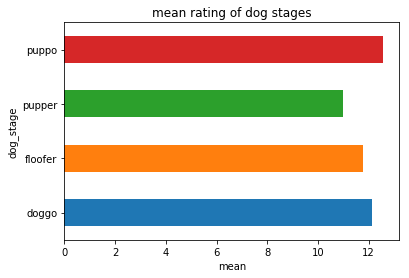

In [61]:
#we have to extract the data for only rows which had the dog stages identified
dog_stage=master_df[master_df['dog_stage']!='not stated']
dog_stage.groupby('dog_stage')['rating_numerator'].mean().plot.barh()
plt.xlabel('mean')
plt.title('mean rating of dog stages')

**It can be observed from the data that the average rating is roughly the same. However, puppo are rated slightly higher than the others, followed by doggo**

### Q2
what has been the followers_counts for the werate_dogs twitter account from 2015 till 2017? Has it been increasing or decreasing

In [62]:
followers_trend=master_df[['date','followers_count']]
#extract the year column from the datetime 
followers_trend['year']=followers_trend['date'].dt.year
followers_trend['month']=followers_trend['date'].dt.month

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5,1,'mean followers for each year')

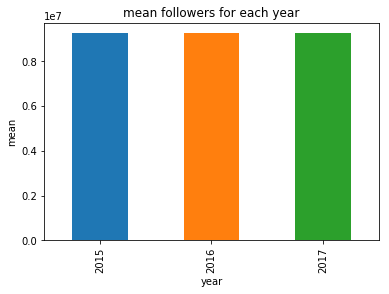

In [63]:
followers_trend.groupby('year')['followers_count'].mean().plot.bar()
plt.ylabel('mean')
plt.title('mean followers for each year')

**The followers have stayed roughly the same over the years, this chart doesnt give the trend, hence, a line chart is needed**

In [63]:
#create the dataframe needed
followers=followers_trend.groupby(['year','month'])['followers_count'].mean().to_frame()

#create the 5 moving average
followers['5_moving_average']=followers['followers_count'].rolling(5).mean()

followers

followers_count  5_moving_average
year month                                   
2015 11        9.257505e+06               NaN
     12        9.257504e+06               NaN
2016 1         9.257524e+06               NaN
     2         9.257551e+06               NaN
     3         9.257541e+06      9.257525e+06
     4         9.257535e+06      9.257531e+06
     5         9.257546e+06      9.257539e+06
     6         9.257536e+06      9.257542e+06
     7         9.257536e+06      9.257539e+06
     8         9.257557e+06      9.257542e+06
     9         9.257536e+06      9.257542e+06
     10        9.257535e+06      9.257540e+06
     11        9.257536e+06      9.257540e+06
     12        9.257545e+06      9.257542e+06
2017 1         9.257551e+06      9.257541e+06
     2         9.257544e+06      9.257542e+06
     3         9.257537e+06      9.257543e+06
     4         9.257550e+06      9.257546e+06
     5         9.257536e+06      9.257544e+06
     6         9.257547e+06      9.257543e+06
     7         9.257534e+06      9.257541e+06
     8         9.257534e+06      9.257540e+06

Text(0,0.5,'Followers')

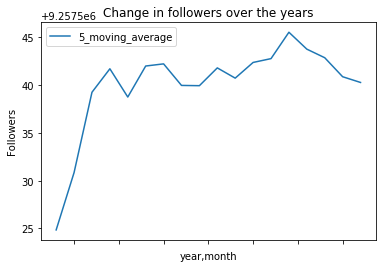

In [64]:
#create the plot
followers.drop(['followers_count'],axis=1).plot()
plt.title('Change in followers over the years')
plt.ylabel('Followers')

### Q3
which posts had the highest retweet_counts?

In [65]:
master_df.sort_values(by='retweet_count',ascending=False)

,tweet_id,jpg_url,img_num,first_prediction,prediction_confidence,dog?,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,date,retweet_count,favorite_count,followers_count
821,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10.0,not_stated,doggo,2016-06-04 23:31:25,53116,107455,9257536
1030,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,not stated,2016-12-09 06:17:20,51906,111993,9257537
1106,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,not_stated,puppo,2017-01-21 18:26:02,40123,124378,9257537
1298,879415818425184262,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10.0,Duddles,not stated,2017-06-26 19:07:24,37597,93083,9257536
1086,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10.0,Bo,doggo,2017-01-11 02:15:36,34697,82852,9257537
1255,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10.0,Jamesy,pupper,2017-05-22 00:28:40,30353,109097,9257536
1081,817827839487737858,https://pbs.twimg.com/ext_tw_video_thumb/81782...,1,cocker_spaniel,0.387608,True,This is Buddy. He ran into a glass door once. ...,https://twitter.com/dog_rates/status/817827839...,13.0,10.0,Buddy,not stated,2017-01-07 20:18:46,25227,48772,9257537
1268,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10.0,Zoey,not stated,2017-06-01 20:18:38,22884,74085,9257536
989,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,13.0,10.0,not_stated,doggo,2016-11-07 03:14:10,22083,46933,9257535
1243,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,True,We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13.0,10.0,not_stated,not stated,2017-05-10 00:08:34,20093,66461,9257537


**above shows the top 5 tweets that had the highest retweet count**

In [66]:
master_df[['rating_numerator','retweet_count','favorite_count','followers_count']].corr()

,rating_numerator,retweet_count,favorite_count,followers_count
rating_numerator,1.000000,0.344515,0.440946,0.147577
retweet_count,0.344515,1.000000,0.926577,0.073013
favorite_count,0.440946,0.926577,1.000000,0.102508
followers_count,0.147577,0.073013,0.102508,1.000000


**it can be observed that retweet count and favorite count had the strongest correlation with value <br>of 0.926577 suggesting that a positive linear relationship**

### Q4
Which dogs had the highest ratings so far

In [67]:
master_df.sort_values(by='rating_numerator',ascending=False).head(10)

,tweet_id,jpg_url,img_num,first_prediction,prediction_confidence,dog?,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,date,retweet_count,favorite_count,followers_count
1091,820314633777061888,https://pbs.twimg.com/media/C2JXyARUAAE4gbL.jpg,2,Gordon_setter,0.940724,True,We are proud to support @LoveYourMelon on thei...,"https://www.loveyourmelon.com/pages/ourstory,h...",14.0,10.0,not_stated,not stated,2017-01-14 17:00:24,523,3165,9257537
1061,813812741911748608,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg,1,French_bulldog,0.709146,True,"Meet Gary, Carrie Fisher's dog. Idk what I can...",https://twitter.com/dog_rates/status/813812741...,14.0,10.0,Gary,not stated,2016-12-27 18:24:12,13102,34714,9257537
1132,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,"Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14.0,10.0,one,not stated,2017-02-06 17:02:17,1251,8986,9257537
1130,828381636999917570,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0.392535,True,Meet Doobert. He's a deaf doggo. Didn't stop h...,https://twitter.com/dog_rates/status/828381636...,14.0,10.0,Doobert,doggo,2017-02-05 23:15:47,2069,11914,9257537
1148,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Meet Kuyu. He was trapped in a well for 10 day...,https://twitter.com/dog_rates/status/831911600...,14.0,10.0,Kuyu,not stated,2017-02-15 17:02:36,6017,25930,9257537
1294,878057613040115712,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,French_bulldog,0.839097,True,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14.0,10.0,Emmy,not stated,2017-06-23 01:10:23,5764,37216,9257535
1114,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14.0,10.0,not_stated,puppo,2017-01-29 02:44:34,16453,54091,9257537
1151,832273440279240704,https://pbs.twimg.com/ext_tw_video_thumb/83227...,1,Pembroke,0.134081,True,Say hello to Smiley. He's a blind therapy dogg...,https://twitter.com/dog_rates/status/832273440...,14.0,10.0,Smiley,doggo,2017-02-16 17:00:25,2159,10698,9257537
896,774314403806253056,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,3,Eskimo_dog,0.596045,True,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,https://twitter.com/dog_rates/status/774314403...,14.0,10.0,not_stated,not stated,2016-09-09 18:31:54,5110,20599,9257536
1102,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,Pomeranian,0.960199,True,This is Gabe. He was the unequivocal embodimen...,https://twitter.com/dog_rates/status/822462944...,14.0,10.0,Gabe,pupper,2017-01-20 15:17:01,13206,26373,9257537
